# MIS 581 Capstone Project
## Purpose: 
### Exploration and analysis of selected data set

In [1]:
%config IPCompleter.greedy=True
from sys import stdout
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from math import floor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import stats
import random
from datetime import datetime

In [2]:
#default color palette
sns.set_palette('deep')

## Load data

In [3]:
ms_telemetry = pd.read_csv('data/Microsoft Dataset/predictive modeling telemetry.csv')
ms_telemetry['datetime'] = pd.to_datetime(ms_telemetry['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_telemetry.set_index(['datetime','machineID'], inplace=True)
ms_telemetry

,,volt,rotate,pressure,vibration
datetime,machineID,,,,
2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...
2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561


In [4]:
ms_telemetry.describe()

,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000
mean,170.777736,446.605119,100.858668,40.385007
std,15.509114,52.673886,11.048679,5.370361
min,97.333604,138.432075,51.237106,14.877054
25%,160.304927,412.305714,93.498181,36.777299
50%,170.607338,447.558150,100.425559,40.237247
75%,181.004493,482.176600,107.555231,43.784938
max,255.124717,695.020984,185.951998,76.791072


In [5]:
ms_machines = pd.read_csv('data/Microsoft Dataset/predictive modeling machines.csv')
ms_machines = ms_machines.set_index(['machineID', 'age', 'model'])
ms_machines

,,
machineID,age,model
1,18,model3
2,7,model4
3,8,model3
4,7,model3
5,2,model3
...,...,...
96,10,model2
97,14,model2
98,20,model2


In [6]:
ms_error = pd.read_csv('data/Microsoft Dataset/predictive modelling errors.csv')
ms_error['datetime'] = pd.to_datetime(ms_error['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_error.set_index(['datetime', 'machineID', 'errorID'], inplace=True)
ms_error['error_count'] = 1
ms_error

,,,error_count
datetime,machineID,errorID,
2015-01-03 07:00:00,1,error1,1
2015-01-03 20:00:00,1,error3,1
2015-01-04 06:00:00,1,error5,1
2015-01-10 15:00:00,1,error4,1
2015-01-22 10:00:00,1,error4,1
...,...,...,...
2015-11-21 08:00:00,100,error2,1
2015-12-04 02:00:00,100,error1,1
2015-12-08 06:00:00,100,error2,1


In [7]:
ms_failure = pd.read_csv('data/Microsoft Dataset/predictive modelling failures.csv')
ms_failure['datetime'] = pd.to_datetime(ms_failure['datetime'], format='%m/%d/%Y %I:%M:%S %p')
ms_failure.set_index(['datetime', 'machineID', 'failure'], inplace=True)
ms_failure['failure_count'] = 1
ms_failure

,,,failure_count
datetime,machineID,failure,
2015-01-05 06:00:00,1,comp4,1
2015-03-06 06:00:00,1,comp1,1
2015-04-20 06:00:00,1,comp2,1
2015-06-19 06:00:00,1,comp4,1
2015-09-02 06:00:00,1,comp4,1
...,...,...,...
2015-11-29 06:00:00,99,comp3,1
2015-12-14 06:00:00,99,comp4,1
2015-02-12 06:00:00,100,comp1,1


## Define functions

In [8]:
#https://nirpyresearch.com/variable-selection-method-pls-python/

def pls_variable_selection(X, y, max_comp, diag=False):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
        
        # Sort spectra accordingly 
        Xc = X.iloc[:,sorted_ind]
        
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc.iloc[:, j:], y)
          
            y_cv = cross_val_predict(pls2, Xc.iloc[:, j:], y, cv=5)
            mse[i,j] = mean_squared_error(y, y_cv)
    
        #comp = 100*(i+1)/(max_comp)
        #stdout.write("\r%d%% completed" % comp)
        #stdout.flush()
    #stdout.write("\n")
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
    if diag:
        print("Optimised number of PLS components: ", mseminx[0]+1)
        print("discarded features",mseminy[0])
        print('Optimised MSEP ', mse[mseminx,mseminy][0])
        stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
    #pls_score_x, pls_score_y = pls.fit_transform(X, y)
    
    #this sorts best feature last
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
    Xc = X.iloc[:,sorted_ind]
    
    y_cv = cross_val_predict(pls, Xc, y, cv=5)
    
    opt_x_component = Xc.iloc[:,mseminy[0]:]
    #pls_score_x_df = pd.DataFrame(y_cv.T[0], index=df.index, columns=['pls_score'])

    return(opt_x_component,y_cv, mseminx[0]+1,mseminy[0], sorted_ind)

In [9]:
def set_failure(failureID = "all", lag=1, window_periods=3):
    
    global ms_telemetry
    global ms_failure
    
    #set period to day
    tel = ms_telemetry
    tel = tel.reset_index('machineID').groupby('machineID', group_keys=False).resample('D').mean()
    #tel = tel.to_period('D')
    tel = tel.reset_index().set_index(['datetime', 'machineID'])
    #tel = tel.mean(level=[0,1])
 
    if failureID == "all":
        fail = ms_failure #for all errors
    else:
        fail = ms_failure.loc(axis=0)[:,:,[failureID]]

    #join to machine model
    #fail = fail.reset_index().set_index('machineID')
    #fail = fail.join(ms_machine['model'])
    
    #period technique
    #fail = fail.reset_index(['machineID', 'failure'])
    #fail = fail.drop(columns = 'failure')
    #fail = fail.to_period('D')
    #fail = fail.reset_index().set_index(['datetime', 'machineID'])
    #fail = fail.sum(level=[0,1]) #consolidate the failures
    
    #resampale techique
    fail = fail.reset_index()
    fail = fail.drop(columns = 'failure')
    
    fail = fail.set_index(['datetime', 'machineID'])
    fail = fail.sum(level=[0,1])
    fail = fail.reset_index(['machineID']).groupby(['machineID'], group_keys=False).resample('D').sum()
    fail = fail[fail['failure_count'] > 0] #remove unnecessary zeros

    fail = fail.reset_index().set_index(['datetime', 'machineID'])

    fail['has_failure'] = (fail['failure_count'] > 0).astype(int)

    complete = tel.join(fail, how='left').fillna(value=0)
    
    #create the error event window
    #NOTE: this excludes the error day
    complete = complete.reset_index().set_index('datetime')
    complete['predict'] = complete.groupby('machineID')['has_failure'].shift(-abs(lag)).fillna(value=0)
    #all error days are excluded, only days prior to error included
    complete.loc[complete['failure_count'] > 0, 'predict'] = 0
    complete = complete.reset_index().set_index(['datetime','machineID'])
    
    
    #create the number of days before failures
    # set next failure date
    copy = complete.copy()
    failures = copy[copy['has_failure'] == 1]
    failures = failures.reset_index()
    failures['next_failure_date'] = failures['datetime']
    failures = failures.set_index(['datetime', 'machineID'])

    copy = copy.join(failures['next_failure_date'])
    copy = copy.sort_index()
    copy.update(copy['next_failure_date'].groupby(level=1).bfill()) #use backfill to fill in the dates
    copy = copy.reset_index()
    #copy.apply(lambda x: x['next_failure_date'] - x['datetime'])

    #def doit(x):
    #    if pd.isnull(x):
    #        return x
    #    return x.to_timestamp()


    #copy['days_to_failure'] = (copy['next_failure_date'].apply(lambda x: doit(x)) - copy['datetime'].apply(lambda x: doit(x))).dt.days
    
    copy['days_to_failure'] = (copy['next_failure_date'] - copy['datetime']).dt.days
    copy = copy.set_index(['datetime', 'machineID'])
    
    complete = copy

    
    complete['rolling_volt'] = complete['volt'].rolling(window_periods, min_periods=1, center=True).mean()
    complete['rolling_rotate'] = complete['rotate'].rolling(window_periods, min_periods=1, center=True).mean()
    complete['rolling_pressure'] = complete['pressure'].rolling(window_periods, min_periods=1, center=True).mean()
    complete['rolling_vibration'] = complete['vibration'].rolling(window_periods, min_periods=1, center=True).mean()

    # find the k-means separation
    X=complete.iloc[:,:4]
    y=complete['predict']

    opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)

    #use k-means clustering on top component to find healthy/unhealthy boundary
    kmeans = KMeans(n_clusters=2, random_state=0).fit(opt_x_component)
    complete.insert(5, 'kmeans_window', kmeans.labels_)
    kmeans_max = opt_x_component[complete['kmeans_window'] == 1].iloc[:,-1].max()
    
    #complete['pre_failure'] = kmeans.labels_
    
    return (complete, kmeans_max)
#    return (complete)

#complete, continuous = set_failure('comp1')
#complete[complete['has_failure'] == 1]

df, df2 = set_failure('comp2')
#df[df['has_failure'] == 1]
df = df.sort_index(level=0)
df[pd.isnull(df['rolling_vibration'])]#[df2['has_failure'] == 1].loc(axis=0)[:,1]
#ms_failure.loc(axis=0)[:,1]

,,volt,rotate,pressure,vibration,failure_count,kmeans_window,has_failure,predict,next_failure_date,days_to_failure,rolling_volt,rolling_rotate,rolling_pressure,rolling_vibration
datetime,machineID,,,,,,,,,,,,,,


In [10]:
#feature scaling to balance the weight of each feature
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
complete, kmeans = set_failure('comp1')
sc = StandardScaler()
scaled = sc.fit_transform(complete.iloc[:,-4:])
scaled


array([[-0.04598708, -0.35846286, -0.45101912,  0.30306596],
       [-0.25658338,  0.00236506, -0.36148362, -0.9513982 ],
       [-0.1493901 ,  0.23376957, -0.40798543, -0.52222215],
       ...,
       [ 0.75514221,  0.70594758,  2.15496001,  1.15075186],
       [ 0.80897694,  0.58372078,  1.82753446,  2.09102152],
       [ 0.60529318,  0.14455109, -0.84585423,  2.33492567]])

## Test out plsd function

In [11]:
complete, kmeans = set_failure('comp2',1, 1)
complete.has_failure = complete.has_failure.astype(int)
X = complete.iloc[:,-4:]
target = complete['predict']

regr_pls = PLSRegression(n_components = 3)
PLS_score_X, PLS_score_Y=regr_pls.fit_transform(X,target)
PLS_loads=regr_pls.x_loadings_
PLS_score_X

array([[-0.29818648, -0.45703478, -0.6642866 ],
       [-0.11587269,  0.41562942,  0.61741015],
       [ 0.52893517, -1.67451885, -0.36228322],
       ...,
       [ 0.65458961,  3.18550314,  0.56969566],
       [ 0.18879792,  0.58844397, -0.32737223],
       [-0.14031781,  1.10003241,  1.04155088]])

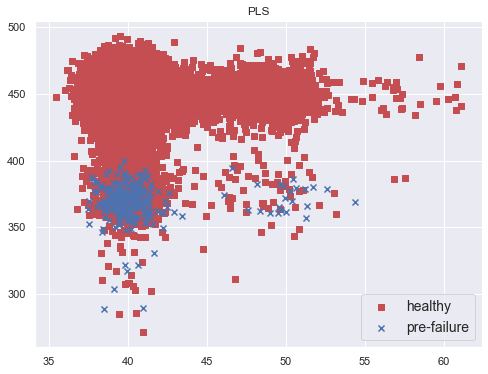

In [12]:
# Plot the transformed data
markers = ['s','x']
colors = ['r','b']
fig = plt.figure(figsize=(8,6))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(target),markers,colors):
    if l==1:
        lab = 'pre-failure'
    else:
        lab= 'healthy'
    ax0.scatter(X['rolling_vibration'][target==l],X['rolling_rotate'][target==l],c=c,marker=m, label=lab)
    #ax0.scatter(PLS_score_X.T[0][target==l],X['rolling_rotate'][target==l],c=c,marker=m, label=lab)
    
plt.title('PLS')
plt.legend(fontsize=14)

## Double check pls selections with correlation plots

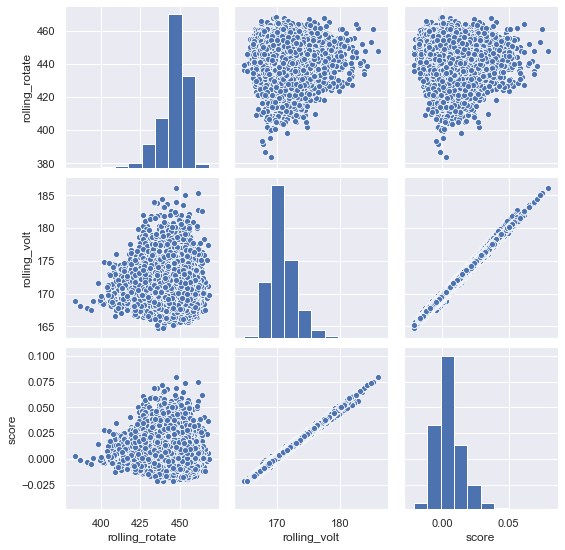

In [13]:
complete, kmeans = set_failure('comp1',1,5)

X=complete.iloc[:,-4:]
y=complete['predict']

opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
opt_x_component['score'] = score_x
sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))




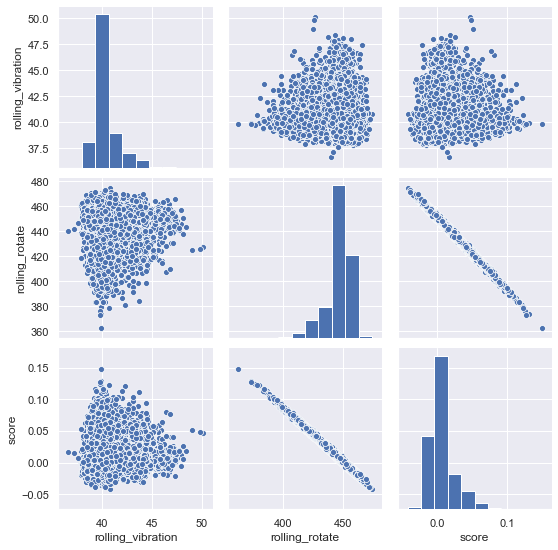

In [14]:
complete, kmeans = set_failure('comp2', 1, 3)


X=complete.iloc[:,-4:]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
opt_x_component['score'] = score_x

sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


selected  [1 3 0 2]


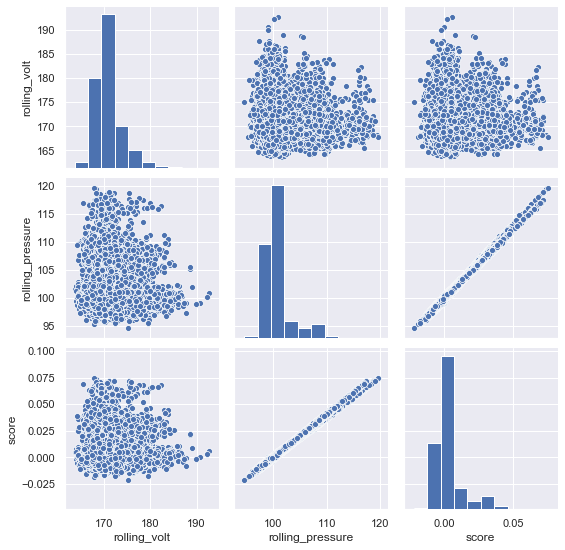

In [15]:
complete, kmeans = set_failure('comp3')


X=complete.iloc[:,-4:]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
opt_x_component['score'] = score_x

sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))
print("selected ", sorted_ind)
#X.iloc[:,sorted_ind].iloc[:,-1:]

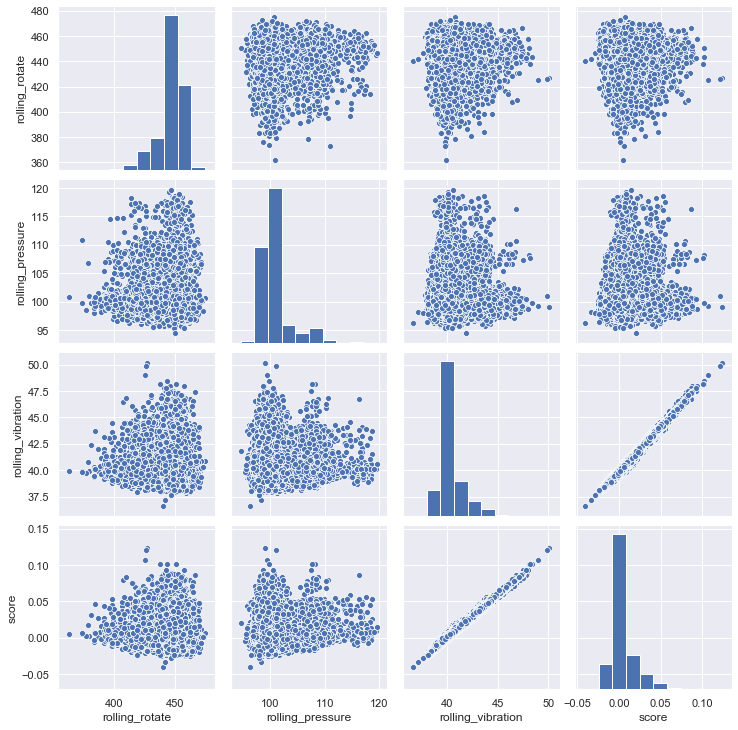

In [16]:
complete, kmeans = set_failure('comp4')


X=complete.iloc[:,-4:]
y=complete['predict']


opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)
opt_x_component['score'] = score_x

sns.pairplot(opt_x_component, vars=list(opt_x_component.columns))


In [17]:
def prep_data(df, pre_failure_window = 10, k_means=False):
    
   
    x=df.iloc[:,-4:]
    y=df['predict']

    opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(x, y, 4)

    if k_means == True:
        kmeans = KMeans(n_clusters=2, random_state=0).fit(opt_x_component.iloc[:,-1:])
        pre_failure_filter = kmeans.labels_
    else:    
        pre_failure_filter = df['days_to_failure'] <= pre_failure_window
        pre_failure_filter = pre_failure_filter.apply(lambda x: int(x == True))

    selectedColumn = opt_x_component.iloc[:,-1]
    
    #last element is the top feature
    selected_index = sorted_ind[len(sorted_ind) - 1];

    error_window = df[df['predict'] == 1]

    #filter out the failure window and failures for non-error runs
    non_error_window = df[pre_failure_filter==0] 

    Y=error_window.loc[:,selectedColumn.name].tolist()
    # make x same size as y, for ideal t-test data
    #X=random.sample(non_error_window.loc[:,selectedColumn.name].tolist(), len(Y))
    X=non_error_window.loc[:,selectedColumn.name].tolist()
    
    return (X, Y)



## Test out k-means clustering for device state identification

No handles with labels found to put in legend.


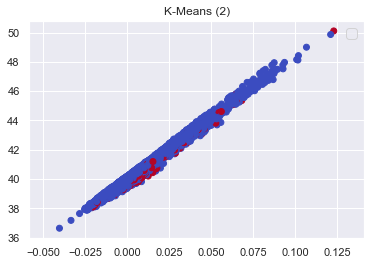

In [18]:
#Identify a boundary for pre-failure state
#use top identified feature

complete, kmeans = set_failure('comp1')
  
X, y = prep_data(complete, 20)
#X=complete.iloc[:,:4]
#y=complete['predict']

#opt_x_component, score_x, ncomp, selected, sorted_ind = pls_variable_selection(X, y, 4)

#use k-means clustering on top component to find healthy/unhealthy boundary
#kmeans = KMeans(n_clusters=2, random_state=0).fit(opt_x_component.iloc[:,-1:])

plt.scatter(x=opt_x_component.iloc[:,-1], y=opt_x_component.iloc[:,-2], c=complete['kmeans_window'], cmap='coolwarm')

plt.title('K-Means (2)')
plt.legend(fontsize=14)

# add numbering of days prior to failure


In [19]:
#test out different dates to check the data
df = complete.reset_index().set_index(['machineID'])
df = df.sort_index(level=0)
#df = df[df['has_failure']==1]
#df
df[df['days_to_failure'] == 7]

,datetime,volt,rotate,pressure,vibration,failure_count,kmeans_window,has_failure,predict,next_failure_date,days_to_failure,rolling_volt,rolling_rotate,rolling_pressure,rolling_vibration
machineID,,,,,,,,,,,,,,,
1,2015-02-27,168.751871,437.923153,100.512639,41.445099,0.0,0,0.0,0.0,2015-03-06,7.0,172.883893,425.330204,99.225381,40.901755
2,2015-03-12,167.623834,437.237998,101.686674,42.125916,0.0,0,0.0,0.0,2015-03-19,7.0,170.321304,444.074010,100.488636,40.848775
3,2015-01-30,167.877739,458.316857,98.376481,38.155911,0.0,0,0.0,0.0,2015-02-06,7.0,167.596241,452.400630,99.058011,39.913975
4,2015-08-23,168.991935,450.356639,99.732880,38.844229,0.0,0,0.0,0.0,2015-08-30,7.0,168.799624,459.018875,99.469337,39.106764
4,2015-02-09,169.046677,459.712473,99.297294,40.149861,0.0,0,0.0,0.0,2015-02-16,7.0,167.934722,452.760299,100.984383,40.246179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2015-02-07,166.951078,421.247300,125.456745,40.258557,0.0,0,0.0,0.0,2015-02-14,7.0,170.574064,434.623660,108.569105,40.020641
99,2015-05-11,170.372416,441.158440,100.357303,40.607010,0.0,0,0.0,0.0,2015-05-18,7.0,170.436097,449.683920,101.934813,40.286037
99,2015-01-26,175.154813,441.337157,97.501540,39.734345,0.0,0,0.0,0.0,2015-02-02,7.0,171.669759,448.965670,98.630029,39.845179


In [20]:
def run_ttest(df, iterations=30, pre_failure_window=5):

    df_stats = pd.DataFrame(columns=['days_to_failure', 'p', 't', 'sample_size_x', 'x_mean', 'x_std', 'normal-px', 'normal-zx', 'sample_size_y', 'y_mean', 'y_std', 'normal-py', 'normal-zy', 'var_stat', 'var_p'])

    #for i in range(floor(avg_max_failure_days)):
    for i in range(0,iterations):

        df = df.reset_index().set_index('datetime')
        df['predict'] = df.groupby('machineID')['has_failure'].shift(-(i+1)).fillna(value=0)
        #all error days are excluded, only days prior to error included
        df.loc[df['failure_count'] > 0, 'predict'] = 0
        df = df.reset_index().set_index(['datetime','machineID'])

        X, Y = prep_data(df, pre_failure_window)

        zx, px = stats.normaltest(X)
        zy, py = stats.normaltest(Y)
        vstat, vp = stats.bartlett(X, Y)    
        t,p=stats.ttest_ind(X, Y, equal_var=False)

        Y_size = len(Y)
        X_size = len(X)

        Y_mean = np.mean(Y)
        X_mean = np.mean(X)
        
        Y_std = np.std(Y)
        X_std = np.std(X)
        
        comp = 100*(i+1)/iterations
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
        #stdout.write("\n")

        df_stats.loc[i] = [i+1, p, t, X_size, X_mean, X_std, px, zx, Y_size, Y_mean, Y_std, py, zy, vstat, vp] 
    #    print("ttest_ind - %g: t=%g p=%g" % (x,t,p))
    
    #set up linear regression line
    linear_regressor = LinearRegression()  # create object for the class
    X = df_stats['days_to_failure'].values.reshape(-1,1)
    Y = df_stats['p'].values.reshape(-1,1)
    linear_regressor.fit(X, Y)  # perform linear regression
    lin_pred = linear_regressor.predict(X)
    df_stats['lin_p'] = lin_pred
    
    return (df_stats)

In [32]:
# figure formatting
def prep_figure(X,Y):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
    ax.set_facecolor("#FFFFFFFF")
    #ax.grid(color='#dddddd')
    ax.spines['bottom'].set_color('000000')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('#dddddd')
    ax.spines['left'].set_color('000000')

    plt.plot(X, Y)

    plt.ylabel('p-value', labelpad=10, fontname="calibri", fontsize=14)
    plt.xlabel('days before failure', labelpad=10, fontname="calibri", fontsize=14)

    for tick in ax.get_xticklabels():
        tick.set_fontname("calibri")
        tick.set_fontsize(12)
    for tick in ax.get_yticklabels():
        tick.set_fontname("calibri")
        tick.set_fontsize(12)
    
    return (fig, ax)

# Temporal t-test on each component

100% completed

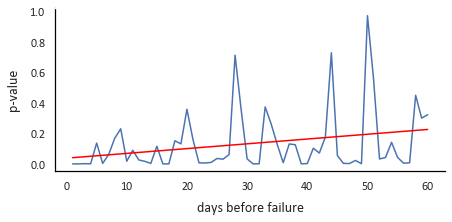

In [22]:
complete, kmeans_max = set_failure('comp1', 1, 1)

iterations = 60
pre_failure_window = 30

df = run_ttest(complete, iterations, pre_failure_window)

X = df['days_to_failure']
Y = df['p']
lin_pred = df['lin_p']

fig, ax = prep_figure(X,Y)

plt.plot(X, lin_pred, color='red', linestyle='dashed')
plt.show()



100% completed

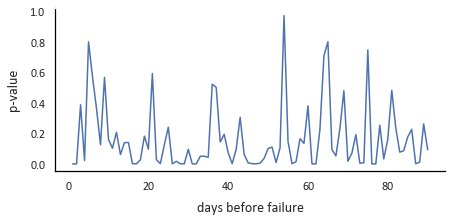

In [30]:
complete, kmeans = set_failure('comp2', 1, 1)
iterations = 90
pre_failure_window = 5

df = run_ttest(complete, iterations)

X = df['days_to_failure']
Y = df['p']
lin_pred = df['lin_p']

fig, ax = prep_figure(X,Y)

plt.show()

100% completed

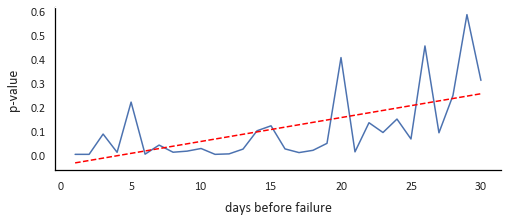

In [34]:
complete, kmeans = set_failure('comp3', 1, 1)
iterations = 30
pre_failure_window = 5

df = run_ttest(complete, iterations, pre_failure_window)

X = df['days_to_failure']
Y = df['p']
lin_pred = df['lin_p']

fig, ax = prep_figure(X,Y)

plt.plot(X, lin_pred, color='red', linestyle='dashed')
plt.show()

100% completed

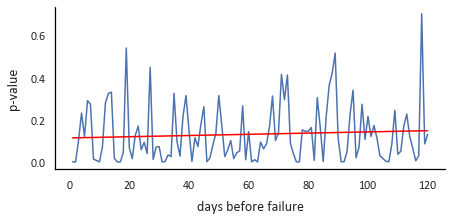

In [25]:
complete, kmeans = set_failure('comp4', 1, 2)
iterations = 120
pre_failure_window = 1

df = run_ttest(complete, iterations, pre_failure_window)

X = df['days_to_failure']
Y = df['p']
lin_pred = df['lin_p']

fig, ax = prep_figure(X,Y)

plt.plot(X, lin_pred, color='red', linestyle='dashed')
plt.show()

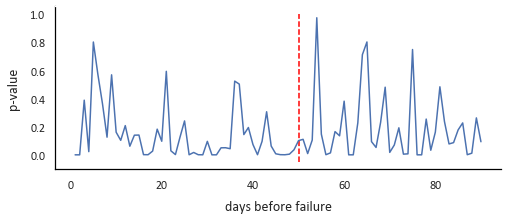

In [33]:
#chart with vertical division line at 50 days
fig, ax = prep_figure(X,Y)

plt.vlines((50), ymin=-.05, ymax=1, color='red',  linestyles='dashed')
plt.show()